<a href="https://colab.research.google.com/github/KilovoIt/Unit-_1-revised/blob/main/LS_DS_122_Chi2_Tests_Assignment_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi^2 Tests

Use the following dataset relating to math scores of students in two different Portugese schools:

<https://archive.ics.uci.edu/ml/datasets/Student+Performance>

### 1) Load the dataset specifically relating to math scores as a new dataframe.

There are two datasets in the `student.zip` file, make sure you use `student-mat.csv`.


In [2]:
from google.colab import files

uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


In [3]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['student-mat.csv']), delimiter=';')

In [4]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


### 2) Use Chi^2 tests and `stats.chi2_contingency()` to identify:
 - Two pairs of variables that are dependent (are associated with one another).
 - Two pairs of variables that are independent (have no significant relationship).

Does it make intuitive sense why the variables in these pairs might or might not show a relationship to one another? 


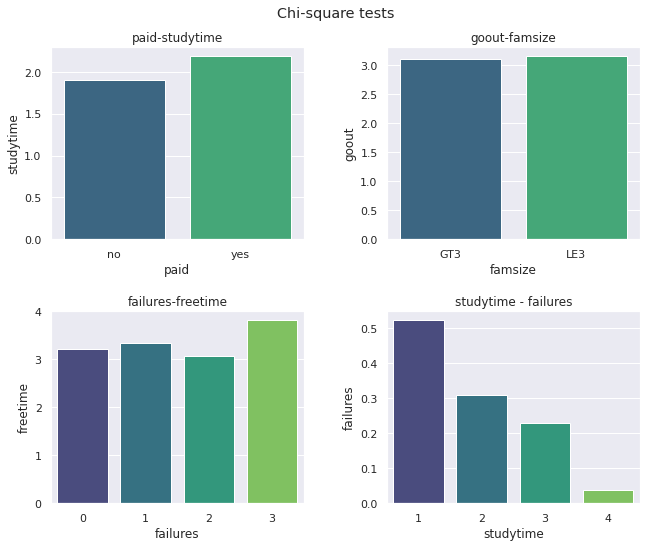

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

fig, ax = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle('Chi-square tests')
fig.tight_layout(pad=4)

sns.barplot(ax=ax[1, 1], x='studytime', y='failures', data=df, ci=None, palette='viridis')
ax[1, 1].set_title('studytime - failures')

sns.barplot(ax=ax[0,1], x=df['famsize'], y=df['goout'], data=df, ci=None, palette='viridis')
ax[0, 1].set_title('goout-famsize')

sns.barplot(ax=ax[0,0], x=df['paid'], y=df['studytime'], data=df, ci=None, palette='viridis')
ax[0, 0].set_title('paid-studytime')

sns.barplot(ax=ax[1,0], x=df['failures'], y=df['freetime'], data=df, ci=None, palette='viridis')
ax[1, 0].set_title('failures-freetime')


school_famsize = pd.crosstab(index=df['famsize'], columns=df['school'], normalize=True)*100

In [43]:
import numpy as np
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from termcolor import colored

le = preprocessing.LabelEncoder()


tests = [['studytime', 'failures'],['famsize', 'goout'],['paid', 'studytime'], ['failures', 'freetime']]



for i in tests:
    stat, p, dof, expected = chi2_contingency(pd.crosstab(le.fit_transform(df[i[0]]), le.fit_transform(df[i[1]])), correction=False)
    if p > 0.05:
        print(f'p-value for 95% confidence interval for {i[0], i[1]}:', colored(f'{p:.3f}', 'cyan'), '\b, no significant dependency found.' ,colored(stat, 'yellow'))
    else:
        print(f'p-value for 95% confidence interval for {i[0], i[1]}:', colored(f'{p:.3f}', 'cyan'), '\b, two columns are dependent.', colored(stat, 'yellow'))

p-value for 95% confidence interval for ('studytime', 'failures'): 0.063 , no significant dependency found. 16.211990808685762
p-value for 95% confidence interval for ('famsize', 'goout'): 0.870 , no significant dependency found. 1.2469421598368893
p-value for 95% confidence interval for ('paid', 'studytime'): 0.002 , two columns are dependent. 14.417578913306178
p-value for 95% confidence interval for ('failures', 'freetime'): 0.042 , two columns are dependent. 21.63057016713022


### 3) Use NumPy to perform your own chi^2 test "from scratch" 

Pick any of the chi^2 tests that you ran in part 2 and try them on your own. You should get the same results that Scipy got for all four values returned from `chi2_contingency()`

In [8]:
crosstab = pd.crosstab(df['studytime'], df['paid'], margins=True)
crosstab

paid,no,yes,All
studytime,,,
1,73,32,105
2,99,99,198
3,31,34,65
4,11,16,27
All,214,181,395


In [45]:
def chi_sq(crosstab, cols, rows):
    array = []
    t = 0
    while t<cols:
        for k in range(rows):
            array.append((crosstab.iloc[k][t] - crosstab.iloc[k][2] * crosstab.iloc[4][t]/crosstab.iloc[4][2])**2/(crosstab.iloc[k][2] * crosstab.iloc[4][t]/crosstab.iloc[4][2]))
        t+=1

    return(sum(array))

chi_sq(crosstab, 2, 4)

14.417578913306178

## Stretch goals:

### 1. Refactor your code so it is elegant, readable, and holds reusable code in functions.

In [ ]:
# YOUR WORK HERE



### 2. Check For Understanding - Study and write your own explanations/definitions for these topics:

- What is a sample "estimate" in statistics?

- What are hypothesis test? How are they useful?

- What is a "null hypothesis?"

- What is a p-value and what does it represent?

- What does it mean for something to be "statistically significant?"

- What is a test statistic and how does it relate to a p-value?

- What are "degrees of freedom" and how are they calculated in a 1-sample, 2-sample, and chi^2 test for independence?

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)